Project: 4  
Name: Melisa Bardhi  
Instructor: Jeff Herman  
Date: 01/01/20   
Blog: https://melisabardhi.medium.com/image-detection-using-convolutional-neural-networks-89c9e21fffa3 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Baseline-CNN" data-toc-modified-id="Baseline-CNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Baseline CNN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Validation" data-toc-modified-id="Validation-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Validation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#VGG19-CNN" data-toc-modified-id="VGG19-CNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>VGG19 CNN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Validation" data-toc-modified-id="Validation-3.0.0.2"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>Validation</a></span><ul class="toc-item"><li><span><a href="#VGG-1-(2-Dense)" data-toc-modified-id="VGG-1-(2-Dense)-3.0.0.2.1"><span class="toc-item-num">3.0.0.2.1&nbsp;&nbsp;</span>VGG 1 (2 Dense)</a></span></li><li><span><a href="#VGG-2-(3-Dense-1-Dropout)" data-toc-modified-id="VGG-2-(3-Dense-1-Dropout)-3.0.0.2.2"><span class="toc-item-num">3.0.0.2.2&nbsp;&nbsp;</span>VGG 2 (3 Dense 1 Dropout)</a></span></li><li><span><a href="#VGG-3-(LR-1e-2)" data-toc-modified-id="VGG-3-(LR-1e-2)-3.0.0.2.3"><span class="toc-item-num">3.0.0.2.3&nbsp;&nbsp;</span>VGG 3 (LR 1e-2)</a></span></li><li><span><a href="#VGG-4-(Adam)" data-toc-modified-id="VGG-4-(Adam)-3.0.0.2.4"><span class="toc-item-num">3.0.0.2.4&nbsp;&nbsp;</span>VGG 4 (Adam)</a></span></li><li><span><a href="#VGG-5-(2-Dense-&amp;-Dropout)" data-toc-modified-id="VGG-5-(2-Dense-&amp;-Dropout)-3.0.0.2.5"><span class="toc-item-num">3.0.0.2.5&nbsp;&nbsp;</span>VGG 5 (2 Dense &amp; Dropout)</a></span></li></ul></li></ul></li></ul></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Baseline-Model-Test" data-toc-modified-id="Baseline-Model-Test-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>Baseline Model Test</a></span></li><li><span><a href="#VGG19-Model-Test" data-toc-modified-id="VGG19-Model-Test-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>VGG19 Model Test</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Future-exploration" data-toc-modified-id="Future-exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Future exploration</a></span></li></ul></div>

# Background

In this project, I build several Convolutional Neural Networks to sift through photos and detect images that contain trees. The models consist of one baseline and five VGG19 CNNs, all of which are compared to determine the best performer. To train the models, I use photos from my nature photography collection supplemented with others from the Kaggle imagenet competition. 

All photos are labeled and partitioned into a training, validation, and test set:
- Training set: used for the model to learn and fit classifier parameters
- Validation set: used to tune the parameters
- Test set: used only to determine performance

In order to improve model performance, I add adversity by:
- flipping the images
- incorporating images that resemble trees
- adding blurred and unsharpened images

To improve baseline model efficiency I:
- use 228 by 228 pixel images
- build 3 layers + 2 dense layers   
- perform max pooling in between the layers to reduce image dimensionality (pooling compresses the spatial size to reduce the amount of parameters and computation in the network)     
- implement the ReLU activation function since it only activates certain neurons, making it more computationally efficient compared to sigmoid or tanh

Warning: Training deep networks is resource intensive; depending on the size of the data, even a simple CNN is apt to take hours to train on a new laptop. Using 30 epochs and 5 layers (alternating between convolutional and pooling), this model took ~40min to run. 


In [1]:
# Import relevant libraries and packages 
import glob
import os
from PIL import Image
from PIL import ImageFilter
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score
np.random.seed(123)
import itertools

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
def get_tvt_split():
    # Create Train / Val / Test folders
    root_dir = 'data'
    pos = '/tree'
    neg = '/not_tree'

    os.makedirs(root_dir +'/train' + pos)
    os.makedirs(root_dir +'/train' + neg)
    os.makedirs(root_dir +'/val' + pos)
    os.makedirs(root_dir +'/val' + neg)
    os.makedirs(root_dir +'/test' + pos)
    os.makedirs(root_dir +'/test' + neg)

    # Create partitions of the data after shuffeling (into 70, 15, 15)
    for currentCls in [pos, neg]:
        src = "data" + currentCls 

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), 
                                                                   int(len(allFileNames)*0.85)])

        # Name folders
        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

        # View count of images after partition
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # Copy-paste images
        for name in train_FileNames:
            shutil.copy(name, "data/train"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, "data/val"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, "data/test"+currentCls)


In [3]:
# Run this one time to create folders and randomly divide photos in them
get_tvt_split()

Total images:  556
Training:  389
Validation:  83
Testing:  84
Total images:  557
Training:  389
Validation:  84
Testing:  84


In [7]:
# Specify reference for directory paths
train_folder = '/Users/mbardhi/Documents/Project4/data/train'
val_folder = '/Users/mbardhi/Documents/Project4/data/val'
test_folder = '/Users/mbardhi/Documents/Project4/data/test'

In [5]:
os.getcwd()

'/Users/mbardhi/Documents/Project4'

In [6]:
# Create more blurred + unsharpened photos of trees in training data 
os.chdir('/Users/mbardhi/Documents/Project4/data/train/tree')
filelist = glob.glob("*.jpg")
count = 0
for imagefile in filelist:
    im = Image.open(imagefile)
    im = im.convert("RGB")
    im_blur = im.filter(ImageFilter.GaussianBlur)
    im_unsharp = im.filter(ImageFilter.UnsharpMask)
    im_blur.save(str(count) + 'bl_' + imagefile)
    im_unsharp.save(str(count) + 'un_' + imagefile)

In [7]:
# Create more blurred + unsharpened photos of non_trees in training data 
os.chdir('/Users/mbardhi/Documents/Project4/data/train/not_tree')
filelist = glob.glob("*.jpg")
count = 0
for imagefile in filelist:
    im = Image.open(imagefile)
    im = im.convert("RGB")
    im_blur = im.filter(ImageFilter.GaussianBlur)
    im_unsharp = im.filter(ImageFilter.UnsharpMask)
    im_blur.save(str(count) + 'bl_' + imagefile)
    im_unsharp.save(str(count) + 'un_' + imagefile)

In [8]:
# Make sure count of pos and neg photos in training folder is roughly equal 
print(len(os.listdir('/Users/mbardhi/Documents/Project4/data/train/tree')))
print(len(os.listdir('/Users/mbardhi/Documents/Project4/data/train/not_tree')))

1051
1035


In [9]:
# Change directory
os.chdir('/Users/mbardhi/Documents/Project4/data/train/tree')

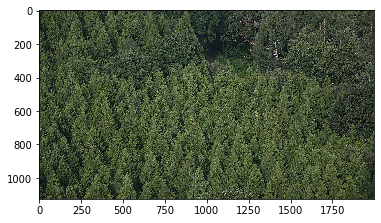

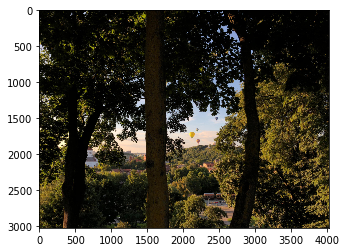

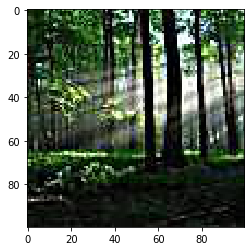

In [10]:
# Preview random training photos with trees
for pic_file in  np.random.choice(os.listdir(), 3):
    img = mpimg.imread(pic_file)
    plt.imshow(img)
    plt.show()

In [11]:
# Change directory
os.chdir('/Users/mbardhi/Documents/Project4/data/train/not_tree')

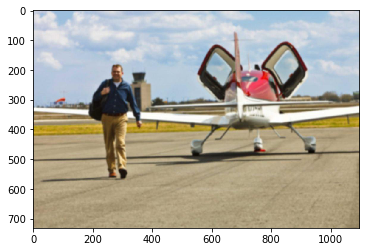

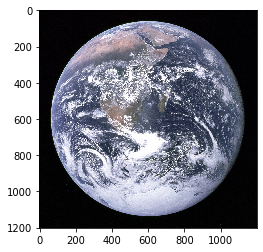

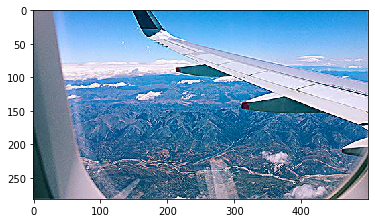

In [12]:
# Preview random training photos with no trees
for pic_file in np.random.choice(os.listdir(), 3):
    img = mpimg.imread(pic_file)
    plt.imshow(img)
    plt.show()

In [13]:
os.chdir('../../..')

In [14]:
# Return current working directory
print(os.getcwd())

/Users/mbardhi/Documents/Project4


# Baseline CNN

In [15]:
# Get model to output 3D feature maps (height, width, features)
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(228, 228, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
# Apply flattening function to convert 3D feature maps in to 1D feature vectors
model.add(Flatten())  

# Add 2 final dense layers to add a classifier to the convolutional base
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 226, 226, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 226, 226, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 111, 111, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 64)       

#### Training

In [18]:
# Define size
batch_size = 16 # Batch size defines the number of samples that will be propagated through the network
target_size = (228, 228) # use the same pixel h * w target size for all images processed

# Configure augmentation for training adversity
# ImageDataGenerator rescales the pixels between zero and one
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Set augmentation for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Read pictures in 'data/train' directory and generate batches of image data with binary labels
train_generator = train_datagen.flow_from_directory(
        'data/train',  
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')  

# Same generator as above, but for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/val',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')

Found 2084 images belonging to 2 classes.
Found 167 images belonging to 2 classes.


Early stopping is used to prevent overfitting. When the model stops improving, its validation accuracy decreases and it starts to overfit to the training data rather than getting better at predicting. In order to preemptively stop this, I set the limit to 5 epochs. This means if the validation accuracy does not improve after 5 epochs, the model will keep the best weights at that point and stop searching. Otherwise, the model will search through a maximum of 50 epochs.

In [19]:
# Set stop to 5 epochs
callback = EarlyStopping(
    monitor='val_acc', 
    restore_best_weights=True,
    patience=5
)

Weight is the parameter within a neural network that transforms input data within its hidden layers. The weight dictates the importance of a neuron; as an input enters the network it is multiplied by it's weight, either amplifying or reducing its significance. Therefore, these weights need to be saved. 

In [21]:
# Warning: the step below takes ~40min.

# Save weights after implemeting callback to later compare
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2084 // batch_size, # 2084 is train generator result
        epochs=30, # num of epochs will dictate speed of model 
        validation_data=validation_generator,
        validation_steps=167 // batch_size, # 167 is validation generator result
        callbacks=[callback]
)
# Create directory to save results
os.mkdir('models')
model.save('models/model_01.h5')

Epoch 1/30
130/130 [==============================] - 103s 794ms/step - loss: 0.2302 - accuracy: 0.9207 - val_loss: 1.1856 - val_accuracy: 0.9125
Epoch 2/30
130/130 [==============================] - 110s 842ms/step - loss: 0.2406 - accuracy: 0.9304 - val_loss: 0.6194 - val_accuracy: 0.9007
Epoch 3/30
130/130 [==============================] - 111s 852ms/step - loss: 0.2856 - accuracy: 0.9168 - val_loss: 0.1555 - val_accuracy: 0.8742
Epoch 4/30
130/130 [==============================] - 109s 837ms/step - loss: 0.2622 - accuracy: 0.9149 - val_loss: 1.0651 - val_accuracy: 0.8808
Epoch 5/30
130/130 [==============================] - 111s 854ms/step - loss: 0.2318 - accuracy: 0.9221 - val_loss: 0.2401 - val_accuracy: 0.9205
Epoch 6/30
130/130 [==============================] - 117s 899ms/step - loss: 0.2502 - accuracy: 0.9299 - val_loss: 0.0844 - val_accuracy: 0.8675
Epoch 7/30
130/130 [==============================] - 112s 860ms/step - loss: 0.3061 - accuracy: 0.9139 - val_loss: 0.4847 -

As we trained the model, we notice accuracy wavered with each epoch, reaching a peak of 93.09% and loss of 24.29% in epoch 14. Let's print some images to validate the results.

#### Validation

Found 167 images belonging to 2 classes.
not_tree


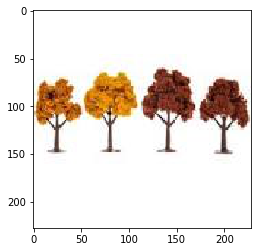


tree


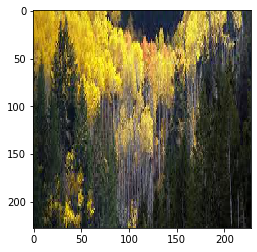


tree


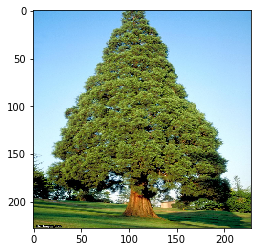


tree


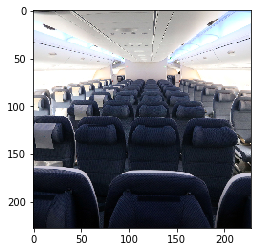


not_tree


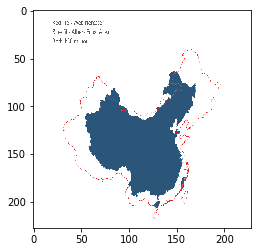

In [22]:
# Validation generator with batch size = 1 
validation_generator = test_datagen.flow_from_directory(
        '/Users/mbardhi/Documents/Project4/data/val',
        target_size=target_size,
        batch_size=1,
        class_mode='binary')

# Preview examples from validation set and labels predicted from baseline model
for _ in range(5):
    x = next(validation_generator)[0]
    print('tree' if model.predict(x)[0][0] > 0.5 else 'not_tree')
    plt.imshow(x.reshape((228, 228, 3)))
    plt.show()
    print()

As we can see, the baseline missclassified one of the five images above.

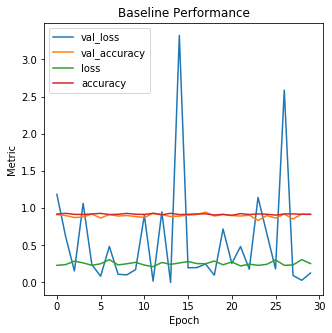

In [23]:
# Plot model training performance
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title('Baseline Performance')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

The baseline is a weak model. Its loss doesn't gradually decrease and the validation loss is very erratic, spiking at epoch 14. Accuracy also doesn't improve with more training throughout the epochs.

# VGG19 CNN

In order to improve upon the baseline CNN, I use VGG19, which is an advanced network with pretrained layers and a better understanding of what defines an image in terms of shape, color, and structure. VGG19 is very deep and has been trained on millions of diverse images with complex classification tasks.

VGG19 consists of 19 layers:
- 16 convolution layers
    - 5 MaxPool layers
    - 1 SoftMax layer
- 3 fully connected layers 

I extract the general structure of VGG19, freeze its initial layers and append a small dense network to it.

In [21]:
# Build VGG16 structure
cnn_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(228, 228, 3))
print('VGG19 Loaded')
print(cnn_base.summary())

VGG19 Loaded
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 228, 228, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 228, 228, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 228, 228, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 114, 114, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 114, 114, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 114, 114, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 57, 57, 128)

As evidenced by the 20 million + paramenters above, this is a very large model. I will save the model's bottlenecked features from the extraction, and append it with a classifier containing final dense layers. (Bottleneck features are the last activation maps before the fully connected layers in VGG19.)

In [25]:
# Specify dataset size
batch_size = 16
nb_train_samples = 2084 
nb_validation_samples = 167 
nb_test_samples = len(os.listdir('data/test/tree')) + len(os.listdir('data/test/not_tree'))

In [26]:
# Build extraction function to get features and labels
def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 7, 7, 512)) 
    labels = np.zeros(shape=(sample_amount))
    datagen = ImageDataGenerator(rescale=1./255) 
    generator = datagen.flow_from_directory(
        directory, target_size=(228, 228), 
        batch_size = batch_size, 
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

#### Training

In [27]:
# Apply extraction function to 3 datasets
train_features, train_labels = extract_features(train_folder, nb_train_samples) 
validation_features, validation_labels = extract_features(val_folder, nb_validation_samples) 
test_features, test_labels = extract_features(test_folder, nb_test_samples)

Found 2084 images belonging to 2 classes.


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Found 167 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [28]:
# Shape data
reshape_y = 7 * 7 * 512
train_features = np.reshape(train_features, (nb_train_samples, reshape_y))
validation_features = np.reshape(validation_features, (nb_validation_samples, reshape_y))
test_features = np.reshape(test_features, (nb_test_samples, reshape_y))

In [29]:
# Save features and labels
os.mkdir('data/bottlenecked')
np.save('data/bottlenecked/train_features.npy', train_features)
np.save('data/bottlenecked/train_labels.npy', train_labels)
np.save('data/bottlenecked/validation_features.npy', validation_features)
np.save('data/bottlenecked/validation_labels.npy', validation_labels)
np.save('data/bottlenecked/test_features.npy', test_features)
np.save('data/bottlenecked/test_labels.npy', test_labels)

#### Validation

##### VGG 1 (2 Dense)

In [30]:
# Build classifier on top of  VGG19
model = Sequential()

# Add dense layers on top of VGG19 
# 1
model.add(Dense(256, activation='relu', input_dim=reshape_y))
# 2
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

# Save VGG19 results
model.save('models/model_VGG_01.h5')

Train on 2084 samples, validate on 167 samples
Epoch 1/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.3743 - acc: 0.8508 - val_loss: 0.0934 - val_acc: 0.9581
Epoch 2/20
2084/2084 [==============================] - 9s 4ms/step - loss: 0.1725 - acc: 0.9242 - val_loss: 0.3801 - val_acc: 0.8323
Epoch 3/20
2084/2084 [==============================] - 9s 4ms/step - loss: 0.1192 - acc: 0.9549 - val_loss: 1.0569 - val_acc: 0.6946
Epoch 4/20
2084/2084 [==============================] - 9s 4ms/step - loss: 0.0725 - acc: 0.9717 - val_loss: 0.0589 - val_acc: 0.9820
Epoch 5/20
2084/2084 [==============================] - 9s 5ms/step - loss: 0.0561 - acc: 0.9789 - val_loss: 0.3883 - val_acc: 0.8623
Epoch 6/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.0436 - acc: 0.9837 - val_loss: 0.0832 - val_acc: 0.9820
Epoch 7/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.0348 - acc: 0.9870 - val_loss: 0.1174 - val_acc: 0.9820
Epoch 8/20
2

We went from a 93.09% accuracy and 24.29% loss in the baseline model, to an accuracy of 99.81% and loss of .51% in epoch 19 of VGG19-1. 

Let's see our training history and try several more versions of VGG19 to potentially yield a better outcome. Though, this one will be hard to beat.

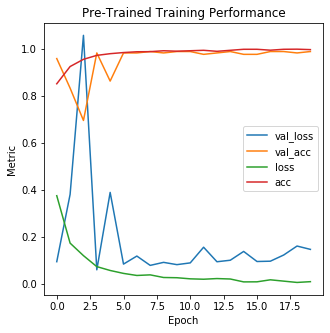

In [31]:
# Print training history
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title('Pre-Trained Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

We notice validation loss and validation accuracy start to improve after the first few epochs. I will tweak some hyperparameters to improve how the model trains and print some prediction examples.

In [32]:
# Validation generator with batch size = 10
validation_generator = test_datagen.flow_from_directory(
        'data/val',
        target_size=(228, 228),
        batch_size=16,
        class_mode='binary')
i = 0

Found 167 images belonging to 2 classes.


not_tree


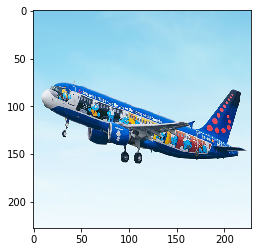


tree


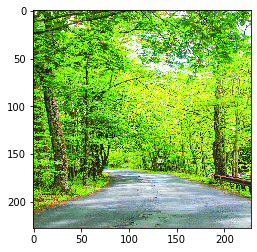


not_tree


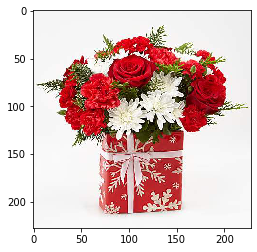


not_tree


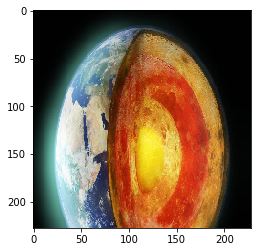


tree


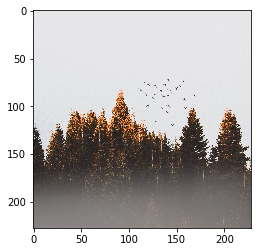


tree


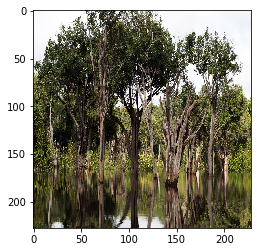


tree


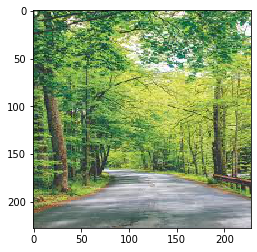


tree


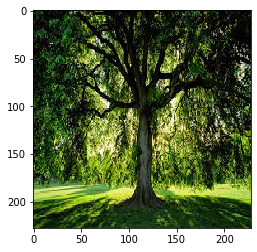


not_tree


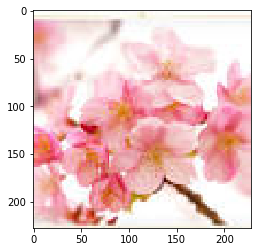


not_tree


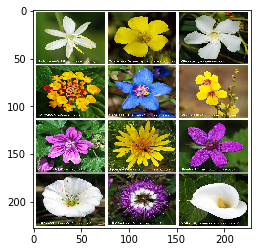

In [33]:
# Run until you use each validation image, printing 10 images at a time
x = next(validation_generator)
for i in range(i, i + 10):
    cnn_pred = cnn_base.predict(x[0][i%10].reshape(1, 228, 228, 3)).flatten().reshape(1, -1)
    print('tree' if model.predict(cnn_pred) > 0.5 else 'not_tree')
    plt.imshow(x[0][i%10].reshape((228, 228, 3)))
    plt.show()
    print()
i += 10

The model predicted all the images correctly. Nonetheless, I will tune its hyperparameters (like the final hidden layers & optimizers), and try a deeper network with a single dropout layer.

Dropout is a technique where randomly selected neurons are ignored during training in order to improve model efficiency. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied on the backward pass. 

In [34]:
# Reload data
train_features = np.load('data/bottlenecked/train_features.npy')
train_labels = np.load('data/bottlenecked/train_labels.npy')
validation_features = np.load('data/bottlenecked/validation_features.npy')
validation_labels = np.load('data/bottlenecked/validation_labels.npy')

In [35]:
train_features.shape

(2084, 25088)

##### VGG 2 (3 Dense 1 Dropout)

In [36]:
count = 2

Train on 2084 samples, validate on 167 samples
Epoch 1/20
2084/2084 [==============================] - 11s 5ms/step - loss: 0.3620 - acc: 0.8388 - val_loss: 0.4730 - val_acc: 0.7904
Epoch 2/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.1804 - acc: 0.9323 - val_loss: 0.0593 - val_acc: 0.9880
Epoch 3/20
2084/2084 [==============================] - 9s 4ms/step - loss: 0.1257 - acc: 0.9544 - val_loss: 0.0690 - val_acc: 0.9760
Epoch 4/20
2084/2084 [==============================] - 11s 5ms/step - loss: 0.0946 - acc: 0.9635 - val_loss: 0.0488 - val_acc: 0.9880
Epoch 5/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.0771 - acc: 0.9679 - val_loss: 0.0568 - val_acc: 0.9880
Epoch 6/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.0588 - acc: 0.9789 - val_loss: 0.0652 - val_acc: 0.9880
Epoch 7/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.0416 - acc: 0.9822 - val_loss: 0.0607 - val_acc: 0.9880
Epoch 8/2

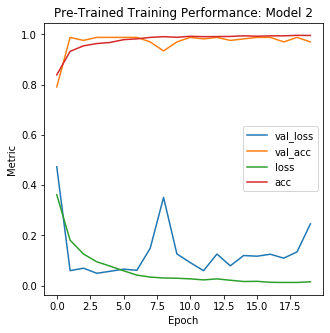

In [37]:
# Deeper VGG19 network
model = Sequential()
# 1
model.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model.add(Dropout(0.2))
# 3
model.add(Dense(64, activation='relu'))
# 4
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))
model.save(f'models/model_VGG_0{count}.h5')
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

Our second model performs slightly worse, with its highest accuracy peaking at 99.62% and loss at 1.24% in epoch 19. We know that the learning rate for deeper networks is so small, so the network might have gotten stuck at a local minimum instead of finding the real lowest minimum (the weight space in deeper architecture is smoother and has very vast "valleys" with local minimas). Dropout somestimes solves this problem, but not in this case. Let's try increasing the learning rate.

##### VGG 3 (LR 1e-2)

Train on 2084 samples, validate on 167 samples
Epoch 1/20
2084/2084 [==============================] - 11s 5ms/step - loss: 6.1224 - acc: 0.7274 - val_loss: 0.4582 - val_acc: 0.8922
Epoch 2/20
2084/2084 [==============================] - 12s 6ms/step - loss: 0.5434 - acc: 0.8460 - val_loss: 0.0928 - val_acc: 0.9641
Epoch 3/20
2084/2084 [==============================] - 12s 6ms/step - loss: 0.3704 - acc: 0.8988 - val_loss: 0.1412 - val_acc: 0.9760
Epoch 4/20
2084/2084 [==============================] - 13s 6ms/step - loss: 0.2898 - acc: 0.9131 - val_loss: 0.1998 - val_acc: 0.9581
Epoch 5/20
2084/2084 [==============================] - 13s 6ms/step - loss: 0.2212 - acc: 0.9338 - val_loss: 0.1437 - val_acc: 0.9820
Epoch 6/20
2084/2084 [==============================] - 12s 6ms/step - loss: 0.2481 - acc: 0.9453 - val_loss: 0.2429 - val_acc: 0.9701
Epoch 7/20
2084/2084 [==============================] - 11s 5ms/step - loss: 0.1413 - acc: 0.9573 - val_loss: 0.1528 - val_acc: 0.9341
Epoch 8/

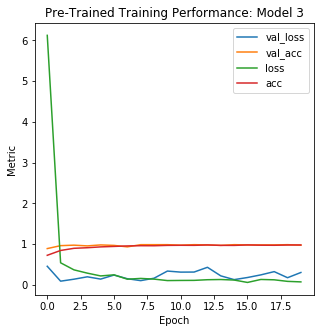

In [38]:
# Reduce learning rate to 1e-2
model = Sequential()
# 1
model.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model.add(Dropout(0.2))
# 3
model.add(Dense(64, activation='relu'))
# 4
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))
model.save(f'models/model_VGG_0{count}.h5')
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

Increasing the learning rate smoothed out our plot, but our performance isn't better yet. Next I will try a different optimizer, Adam.

##### VGG 4 (Adam)

Train on 2084 samples, validate on 167 samples
Epoch 1/20
2084/2084 [==============================] - 14s 7ms/step - loss: 0.3764 - acc: 0.8690 - val_loss: 0.0758 - val_acc: 0.9641
Epoch 2/20
2084/2084 [==============================] - 13s 6ms/step - loss: 0.1317 - acc: 0.9487 - val_loss: 0.1062 - val_acc: 0.9701
Epoch 3/20
2084/2084 [==============================] - 14s 7ms/step - loss: 0.1138 - acc: 0.9506 - val_loss: 0.0590 - val_acc: 0.9880
Epoch 4/20
2084/2084 [==============================] - 14s 7ms/step - loss: 0.0495 - acc: 0.9813 - val_loss: 0.0442 - val_acc: 0.9880
Epoch 5/20
2084/2084 [==============================] - 15s 7ms/step - loss: 0.0523 - acc: 0.9808 - val_loss: 0.0644 - val_acc: 0.9701
Epoch 6/20
2084/2084 [==============================] - 14s 7ms/step - loss: 0.0362 - acc: 0.9842 - val_loss: 0.0883 - val_acc: 0.9760
Epoch 7/20
2084/2084 [==============================] - 16s 8ms/step - loss: 0.0324 - acc: 0.9851 - val_loss: 0.0691 - val_acc: 0.9880
Epoch 8/

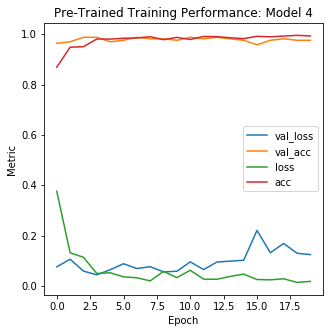

In [39]:
# Try adam optimizer
model = Sequential()
# 1
model.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model.add(Dropout(0.2))
# 3
model.add(Dense(64, activation='relu'))
# 4
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))
model.save(f'models/model_VGG_0{count}.h5')
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

Adam is a good alternative to relu, but accuracy is still not better than our first model. A shallow network might be the best bet here. Next, I will try another shallow network with a dropout layer.

##### VGG 5 (2 Dense & Dropout)

Train on 2084 samples, validate on 167 samples
Epoch 1/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.5000 - acc: 0.7716 - val_loss: 0.3191 - val_acc: 0.9042
Epoch 2/20
2084/2084 [==============================] - 9s 4ms/step - loss: 0.3268 - acc: 0.8829 - val_loss: 0.2429 - val_acc: 0.8982
Epoch 3/20
2084/2084 [==============================] - 9s 5ms/step - loss: 0.2663 - acc: 0.9021 - val_loss: 0.1895 - val_acc: 0.9521
Epoch 4/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.2309 - acc: 0.9203 - val_loss: 0.1735 - val_acc: 0.9401
Epoch 5/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.1992 - acc: 0.9304 - val_loss: 0.1722 - val_acc: 0.9401
Epoch 6/20
2084/2084 [==============================] - 11s 5ms/step - loss: 0.1818 - acc: 0.9424 - val_loss: 0.1273 - val_acc: 0.9760
Epoch 7/20
2084/2084 [==============================] - 10s 5ms/step - loss: 0.1621 - acc: 0.9496 - val_loss: 0.1175 - val_acc: 0.9820
Epoch 8/20

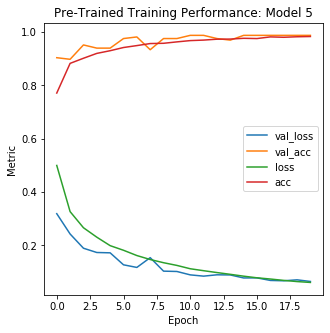

In [40]:
# Shallower network
model = Sequential()
# 1
model.add(Dense(256, activation='relu', input_dim=train_features.shape[1]))
# 2
model.add(Dropout(0.2))
# 3
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=5e-6),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))
model.save(f'models/model_VGG_0{count}.h5')
pd.DataFrame(history.history).plot(figsize=(5, 5))
plt.title(f'Pre-Trained Training Performance: Model {count}')
plt.xlabel('Epoch')
plt.ylabel('Metric')
count += 1
plt.show()

This model trained well with loss dropping to 6.11% and increasing accuracy increasing to 98.37% in epoch 20. But we still can't seem to break that .51% loss and 99.81% accuracy from the first model. It looks like we maxed out performance on the first try. 

# Testing

Metrics: 

Accuracy (TP+TN/TP+FP+FN+TN): Accuracy is the ratio of correctly predicted observations to the total observations. This is the ratio of correctly predicted images with trees and images without trees, out of the total population of images.

Precision (TP/TP+FP): Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. This is the ratio of correctly predicted images with trees out of all images (some of which don't contain trees).

Recall (TP/TP+FN): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. Or, all images with trees, out of all images that actually had trees (some of which were FN or photos with trees that were missed by the model).

F1 (2x(Recall x Precision) / (Recall + Precision)): F1 Score is the weighted average of Precision and Recall, thereby taking both false positives and false negatives into account. F1 ranges from 0 to 1, with a better score being higher.

Which metric matters?

The best metric for model comparison is accuracy since we are mainly focused with being correct in identifying trees, rather than reducing the number of false positives vs. false negatives. 

Below I will compare the performance of the baseline (using ImageDataGenerator) to the VGG19 models (using the preloaded numpy array containing the weights).

#### Baseline Model Test

In [2]:
# Sort models
print(os.listdir('models'))
print(sorted(os.listdir('models')))

['model_VGG_03.h5', 'model_01.h5', 'model_VGG_02.h5', 'model_VGG_05.h5', 'model_VGG_01.h5', 'model_VGG_04.h5']
['model_01.h5', 'model_VGG_01.h5', 'model_VGG_02.h5', 'model_VGG_03.h5', 'model_VGG_04.h5', 'model_VGG_05.h5']


In [3]:
# Load baseline
model_baseline = load_model(('models/model_01.h5'))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [4]:
# Load VGG Models
models_VGG = {model: load_model('models/' + model) for model in os.listdir('models')[0:] if model != 'model_01.h5'} 

In [5]:
# Confirm baseline 
model_baseline.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 226, 226, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 226, 226, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 111, 111, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 64)       

In [11]:
# Get test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                        'data/test',
                        target_size=(228, 228),
                        batch_size=16,
                        class_mode='binary')

Found 168 images belonging to 2 classes.


In [12]:
# Print baseline scores 
model_baseline.evaluate_generator(test_generator,
                                 steps=168 // 16)

[3.3459632396698, 0.887499988079071]

Not bad, our baseline achieved a 88.7% accuracy on the test set. Let's now evaluate the VGG models.

#### VGG19 Model Test

In [13]:
# Get pretrained test features
test_features = np.load('data/bottlenecked/test_features.npy')
test_labels = np.load('data/bottlenecked/test_labels.npy')

In [14]:
# Print model scores
for model_name, model in models_VGG.items():
    print(model_name  + ' Evaluation')
    print(model.evaluate(test_features, test_labels))
    print()

model_VGG_03.h5 Evaluation
168/168 [==============================] - 0s 1ms/step
[2.49793294214067, 0.9166666865348816]

model_VGG_02.h5 Evaluation
168/168 [==============================] - 0s 1ms/step
[0.7844930342620328, 0.9166666865348816]

model_VGG_05.h5 Evaluation
168/168 [==============================] - 0s 1ms/step
[0.23519924141111828, 0.9047619104385376]

model_VGG_01.h5 Evaluation
168/168 [==============================] - 0s 900us/step
[0.5509798498380751, 0.9226190447807312]

model_VGG_04.h5 Evaluation
168/168 [==============================] - 0s 1ms/step
[0.6067836596852257, 0.8928571343421936]



The VGG19-1 model had the highest overall accuracy at 91.67%. The model with the lowest accuracy was VGG19-4 which was deeper and used the Adam optimizer.


In [15]:
# View model summary
best_model = models_VGG['model_VGG_01.h5']
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


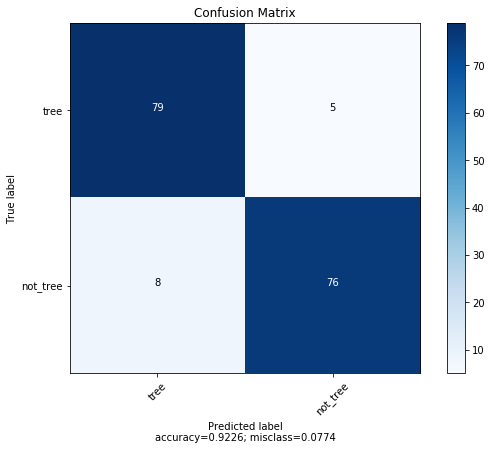

In [16]:
# Plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=False):
   
    
    # Accuracy score
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    # Colormap gradient
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Show classification classes
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    # Plot raw numbers or proportions
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
   
    # Text settings
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

y_test = test_labels

# Predict probabilities
y_pred = best_model.predict(test_features)
y_score = np.array([int(x > 0.5) for x in y_pred])
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm, ['tree', 'not_tree'])

In our test set, out of a total of 168 images, we had:
- 79 correctly identified images with trees (True Positives)
- 76 correctly identified images without trees (True Negatives)
- 8 images identified with trees which did not have trees (False Positives)
- 5 images identified without trees which did have trees (False Negatives)

Our FP rate (4.7%) is higher than our FN rate (2.9%) meaning the model is more likely to identify trees where there are none.

In [17]:
# Print scores
print("Precision Score: ", precision_score(y_test, y_score))
print("Recall Score: ", recall_score(y_test, y_score))

Precision Score:  0.9382716049382716
Recall Score:  0.9047619047619048


Precision is higher than recall.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


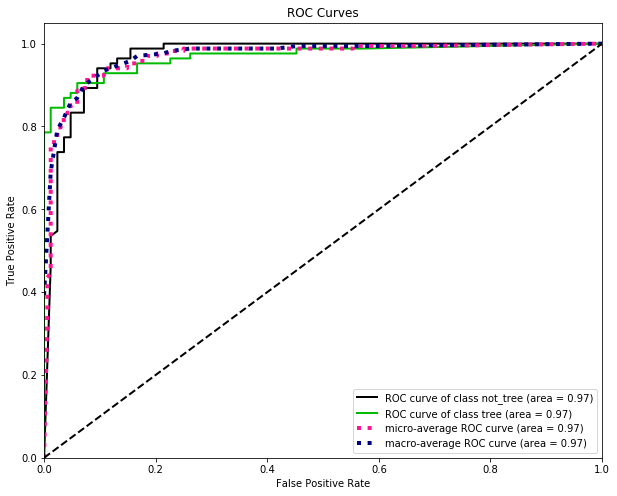

In [18]:
# Plot ROC curve
skplt.metrics.plot_roc_curve(['tree' if x != 0 else 'not_tree' for x in y_test] , 
                              np.concatenate([1 - y_pred, y_pred], axis=1), 
                             figsize=(10, 8))
plt.show()

Our ROC Curves stretch to the upper lefthand corner indicating our true positive rate has a very small tradeoff with our false positive rate. Below I will look at some of the missidentified photos to determine a reason why. 

In [19]:
# Get test images
test_datagen = ImageDataGenerator(rescale=1./255)
full_test_generator = test_datagen.flow_from_directory(
                        'data/test',
                        target_size=(228, 228),
                        batch_size=297,
                        class_mode='binary')

Found 168 images belonging to 2 classes.


tree


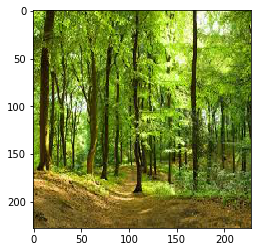


not_tree


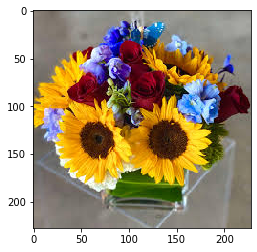


not_tree


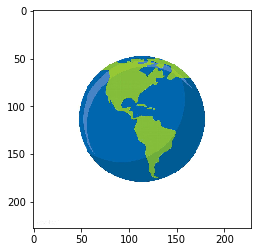


tree


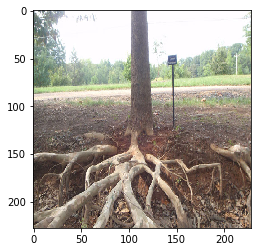


not_tree


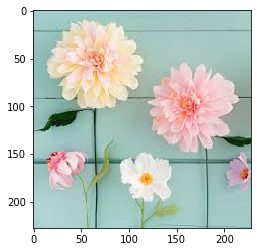

In [37]:
# Print more misclassified images
x = next(full_test_generator)
for i in range(5):
    cnn_pred = cnn_base.predict(x[0][i].reshape(1, 228, 228, 3)).flatten().reshape(1, -1)
    full_pred = (best_model.predict(cnn_pred) <= 0.5)
    if full_pred != int(x[1][i]):
        print('not_tree' if full_pred else 'tree')
        plt.imshow(x[0][i].reshape((228, 228, 3)))
        plt.show()
        print()

From running several tests, it appears in the few times the model is mistaken, it is typically because it gets confused between plants and trees, or has trouble identifying the target when there is distance in the image.

# Results

The results show that even with a small dataset of only 1111 images, we can fit a very robust pretrained model with 99.81% accuracy and .51% loss. 

Pretraining gave us an immediate performance boost before tuning any hyperparameters. Interestingly, the first VGG19, which was also the most shallow, outperformed all of the other four versions which contained more layers. This may be unexpected. It is because the first portion of the network found an effective set of weights to optimize the objective of classifying the target, whereas the layers in the latter portion of the network were only adding noise.

# Future exploration

In order to better train the model one would need photos with even higher variance, especially in the categories it missed (such as images that resemble trees or in which trees are in the distance or background).